In [1]:
!pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install matplotlib


In [10]:
import seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
    df = pd.read_csv('C:\\Users\\Asus\\Desktop\\student_performance_custom.csv', encoding='unicode_escape')

In [6]:
df.shape

(100, 4)

In [8]:
df.head(10)

,StudentID,Marks,Attendance,Logins
0,1,81,44,27
1,2,44,65,41
2,3,90,94,36
3,4,50,53,37
4,5,53,78,5
5,6,32,66,23
6,7,51,48,6
7,8,82,54,48
8,9,31,54,30
9,10,59,65,36


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   StudentID   100 non-null    int64
 1   Marks       100 non-null    int64
 2   Attendance  100 non-null    int64
 3   Logins      100 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB


In [10]:
pd.isnull(df).sum

<bound method DataFrame.sum of     StudentID  Marks  Attendance  Logins
0       False  False       False   False
1       False  False       False   False
2       False  False       False   False
3       False  False       False   False
4       False  False       False   False
..        ...    ...         ...     ...
95      False  False       False   False
96      False  False       False   False
97      False  False       False   False
98      False  False       False   False
99      False  False       False   False

[100 rows x 4 columns]>

In [13]:
df['Marks'] = df['Marks'].fillna(df['Marks'].mean())
df['Attendance'] = df['Attendance'].fillna(df['Attendance'].mean())
df['Logins'] = df['Logins'].fillna(df['Logins'].mean())

In [14]:
# Summary statistics
print(df.describe())

# Average Marks, Attendance, Logins
print("Average Marks:", df['Marks'].mean())
print("Average Attendance:", df['Attendance'].mean())
print("Average Logins:", df['Logins'].mean())


        StudentID       Marks  Attendance      Logins
count  100.000000  100.000000   100.00000  100.000000
mean    50.500000   62.800000    71.54000   25.800000
std     29.011492   21.068431    17.58869   12.595494
min      1.000000   30.000000    40.00000    5.000000
25%     25.750000   43.750000    55.50000   15.000000
50%     50.500000   64.000000    71.50000   25.500000
75%     75.250000   82.000000    88.00000   37.000000
max    100.000000   94.000000    99.00000   48.000000
Average Marks: 62.8
Average Attendance: 71.54
Average Logins: 25.8


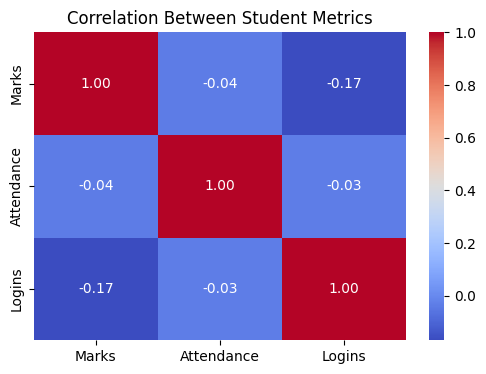

In [15]:
# Correlation between features
corr = df[['Marks', 'Attendance', 'Logins']].corr()

# Heatmap visualization
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Student Metrics")
plt.show()


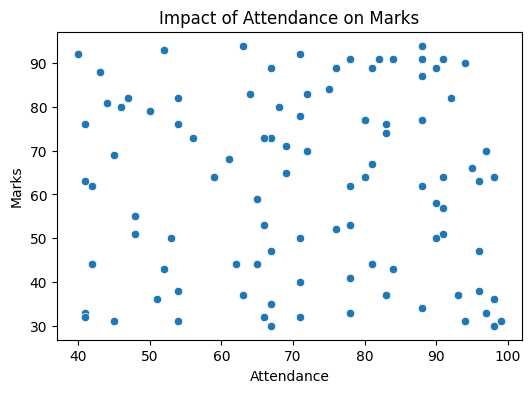

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Attendance", y="Marks", data=df)
plt.title("Impact of Attendance on Marks")
plt.show()

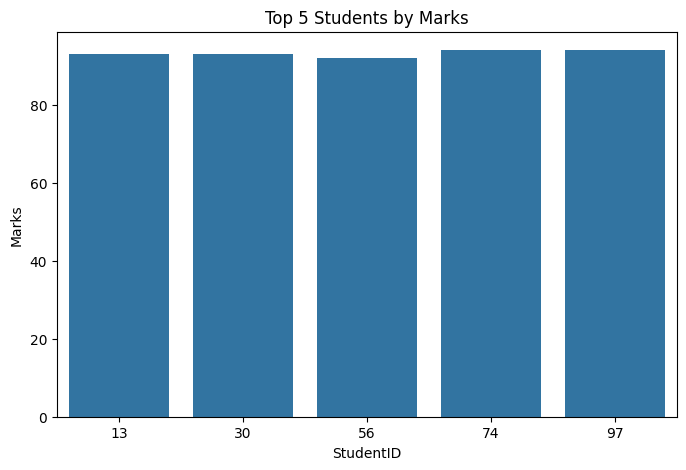

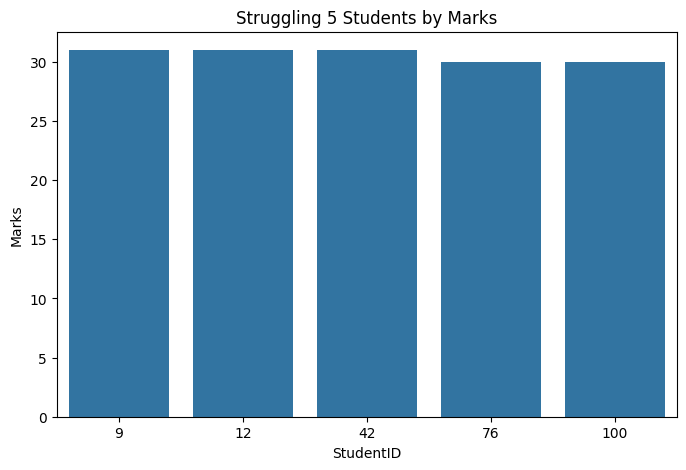

In [22]:
# Top Students
plt.figure(figsize=(8,5))
sns.barplot(x="StudentID", y="Marks", data=top_students)
plt.title("Top 5 Students by Marks")
plt.show()

# Struggling Students
plt.figure(figsize=(8,5))
sns.barplot(x="StudentID", y="Marks", data=struggling_students)
plt.title("Struggling 5 Students by Marks")
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_13468\1506767881.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Risk", data=df, palette="Set2")


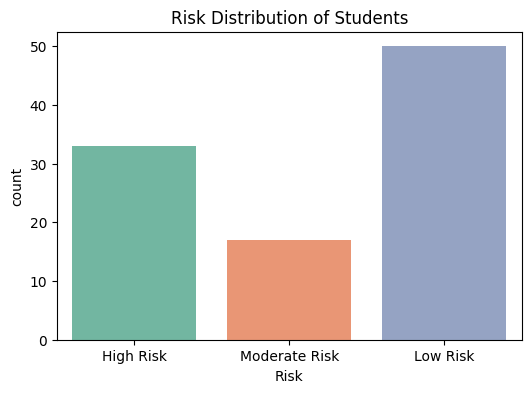

In [23]:
def risk_level(row):
    if row['Marks'] < 40 or row['Attendance'] < 50:
        return 'High Risk'
    elif (40 <= row['Marks'] < 50) or (50 <= row['Attendance'] < 60):
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['Risk'] = df.apply(risk_level, axis=1)

# Countplot of Risk Levels
plt.figure(figsize=(6,4))
sns.countplot(x="Risk", data=df, palette="Set2")
plt.title("Risk Distribution of Students")
plt.show()


In [24]:
# Grouping by Risk
risk_summary = df.groupby("Risk").agg({
    "Marks":"mean",
    "Attendance":"mean",
    "Logins":"mean",
    "StudentID":"count"
}).rename(columns={"StudentID":"Number of Students"})

print(risk_summary)


                   Marks  Attendance     Logins  Number of Students
Risk                                                               
High Risk      46.969697   62.757576  28.000000                  33
Low Risk       74.540000   79.940000  23.620000                  50
Moderate Risk  59.000000   63.882353  27.941176                  17


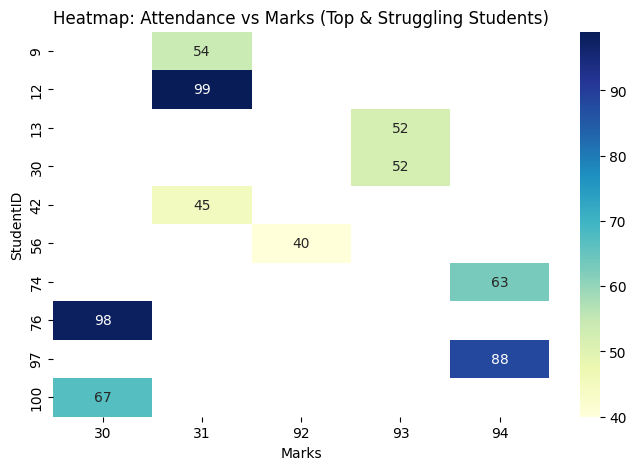

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(compare_df.pivot(index="StudentID", columns="Marks", values="Attendance"),
            annot=True, cmap="YlGnBu", cbar=True)
plt.title("Heatmap: Attendance vs Marks (Top & Struggling Students)")
plt.show()

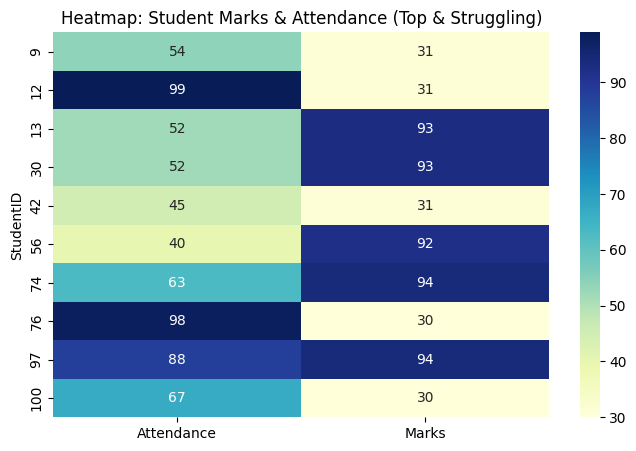

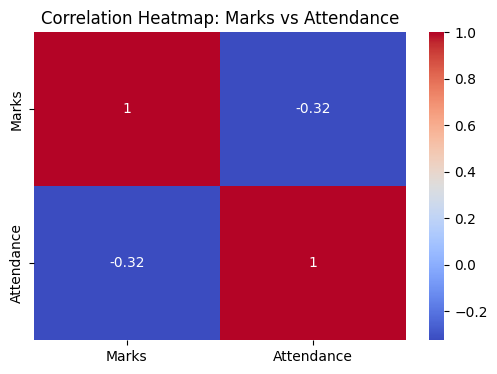

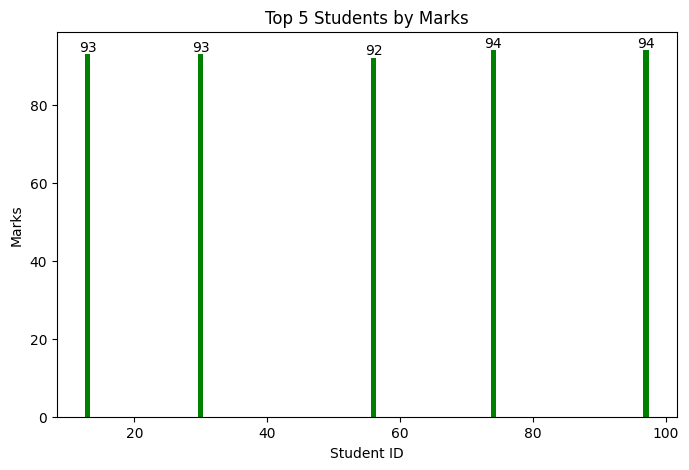

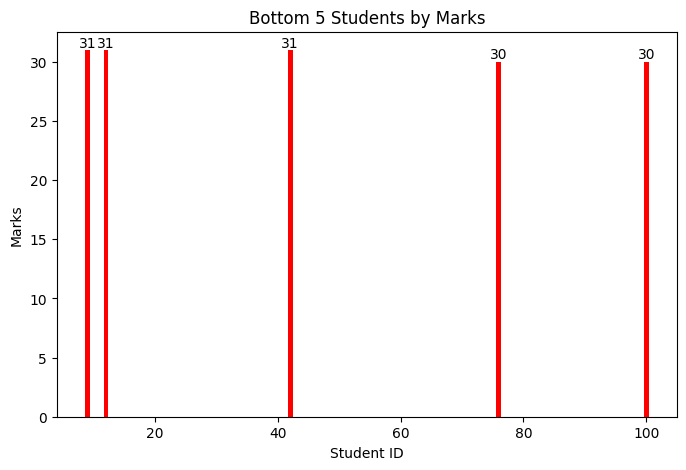

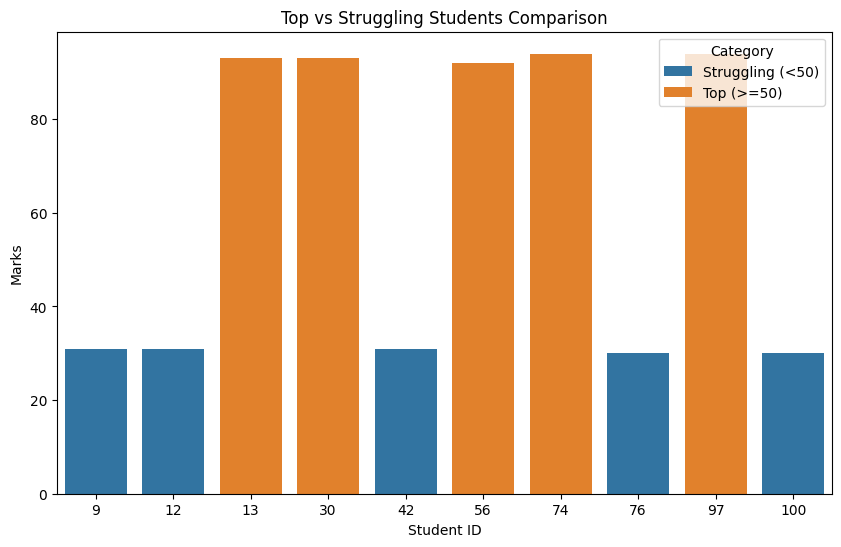

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Top & Struggling students already defined
# top_students = df.nlargest(5, 'Marks')
# struggling_students = df.nsmallest(5, 'Marks')

# --- Combine both groups into one dataframe ---
compare_df = pd.concat([top_students, struggling_students])

# --- Heatmap Option 1: Student-wise (Marks & Attendance per StudentID) ---
plt.figure(figsize=(8,5))
pivot_data = compare_df.pivot_table(index="StudentID", values=["Marks", "Attendance"])
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Heatmap: Student Marks & Attendance (Top & Struggling)")
plt.show()

# --- Heatmap Option 2: Correlation (Marks vs Attendance) ---
plt.figure(figsize=(6,4))
sns.heatmap(compare_df[["Marks", "Attendance"]].corr(), annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Marks vs Attendance")
plt.show()

# --- Bar Chart: Top Students ---
plt.figure(figsize=(8,5))
bars = plt.bar(top_students["StudentID"], top_students["Marks"], color="green")
plt.bar_label(bars)
plt.title("Top 5 Students by Marks")
plt.xlabel("Student ID")
plt.ylabel("Marks")
plt.show()

# --- Bar Chart: Struggling Students ---
plt.figure(figsize=(8,5))
bars = plt.bar(struggling_students["StudentID"], struggling_students["Marks"], color="red")
plt.bar_label(bars)
plt.title("Bottom 5 Students by Marks")
plt.xlabel("Student ID")
plt.ylabel("Marks")
plt.show()

# --- Side by Side Bar Chart: Top vs Struggling (Comparative) ---
compare_df["Category"] = compare_df["Marks"].apply(lambda x: "Top (>=50)" if x >= 50 else "Struggling (<50)")

plt.figure(figsize=(10,6))
sns.barplot(x="StudentID", y="Marks", data=compare_df, hue="Category", dodge=False)
plt.title("Top vs Struggling Students Comparison")
plt.xlabel("Student ID")
plt.ylabel("Marks")
plt.show()


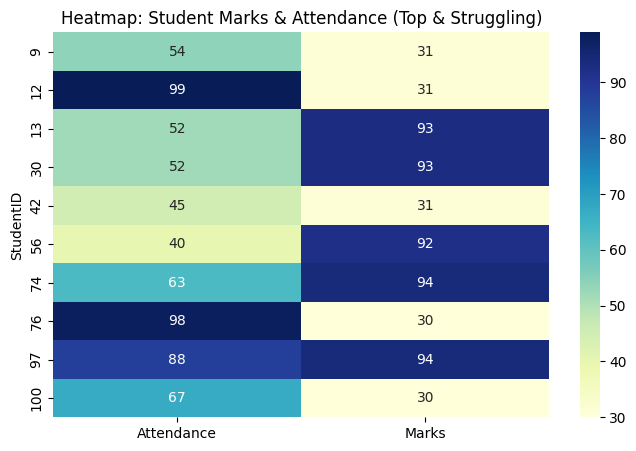

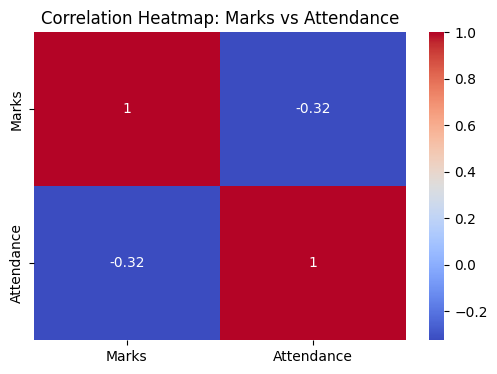

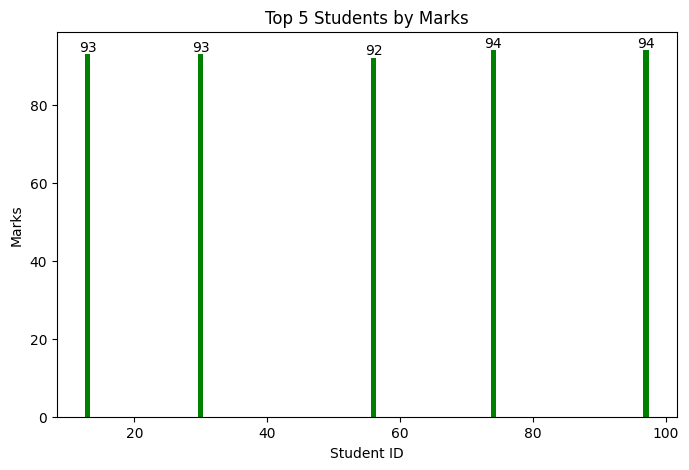

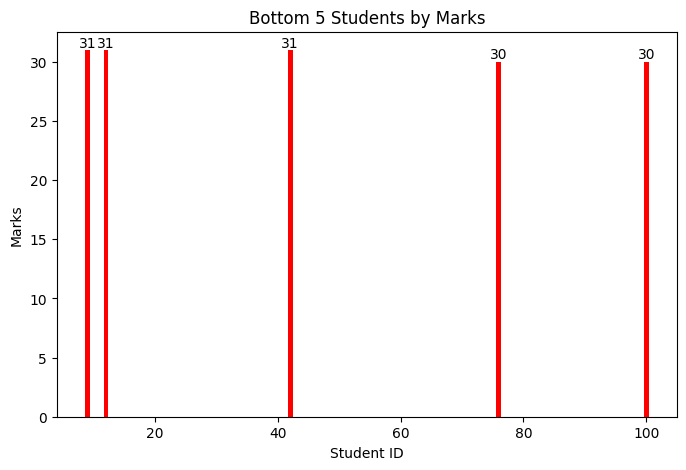

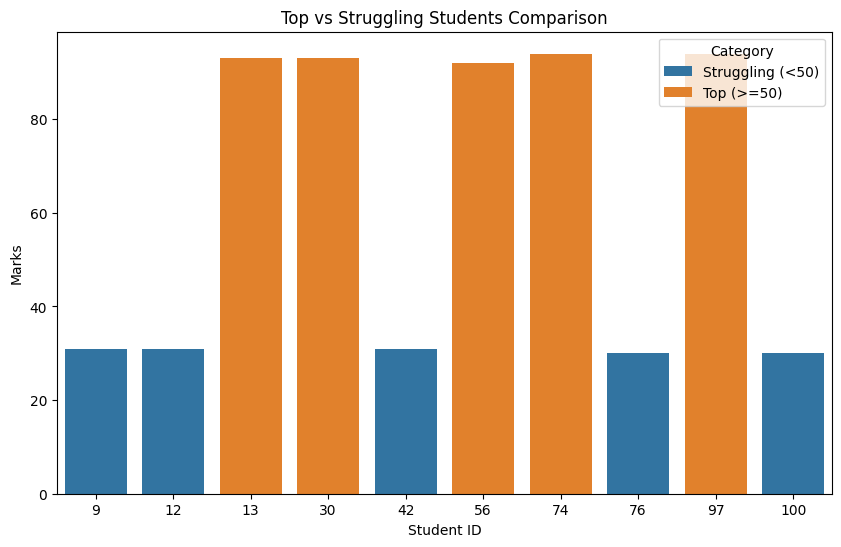

In [35]:

# --- Combine both groups into one dataframe ---
compare_df = pd.concat([top_students, struggling_students])

# --- Heatmap Option 1: Student-wise (Marks & Attendance per StudentID) ---
plt.figure(figsize=(8,5))
pivot_data = compare_df.pivot_table(index="StudentID", values=["Marks", "Attendance"])
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Heatmap: Student Marks & Attendance (Top & Struggling)")
plt.show()

# --- Heatmap Option 2: Correlation (Marks vs Attendance) ---
plt.figure(figsize=(6,4))
sns.heatmap(compare_df[["Marks", "Attendance"]].corr(), annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Marks vs Attendance")
plt.show()

# --- Bar Chart: Top Students ---
plt.figure(figsize=(8,5))
bars = plt.bar(top_students["StudentID"], top_students["Marks"], color="green")
plt.bar_label(bars)
plt.title("Top 5 Students by Marks")
plt.xlabel("Student ID")
plt.ylabel("Marks")
plt.show()

# --- Bar Chart: Struggling Students ---
plt.figure(figsize=(8,5))
bars = plt.bar(struggling_students["StudentID"], struggling_students["Marks"], color="red")
plt.bar_label(bars)
plt.title("Bottom 5 Students by Marks")
plt.xlabel("Student ID")
plt.ylabel("Marks")
plt.show()

# --- Side by Side Bar Chart: Top vs Struggling (Comparative) ---
compare_df["Category"] = compare_df["Marks"].apply(lambda x: "Top (>=50)" if x >= 50 else "Struggling (<50)")

plt.figure(figsize=(10,6))
sns.barplot(x="StudentID", y="Marks", data=compare_df, hue="Category", dodge=False)
plt.title("Top vs Struggling Students Comparison")
plt.xlabel("Student ID")
plt.ylabel("Marks")
plt.show()


In [36]:
from sklearn.linear_model import LinearRegression

X = df[['Attendance', 'Logins']]
y = df['Marks']

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-0.0542156  -0.28406405]
Intercept: 74.00743674612607


In [37]:
df["Risk_Status"] = df.apply(lambda row: "At Risk" if (row["Marks"] < 50 or row["Attendance"] < 60) else "Safe", axis=1)


<Axes: xlabel='Attendance', ylabel='Marks'>

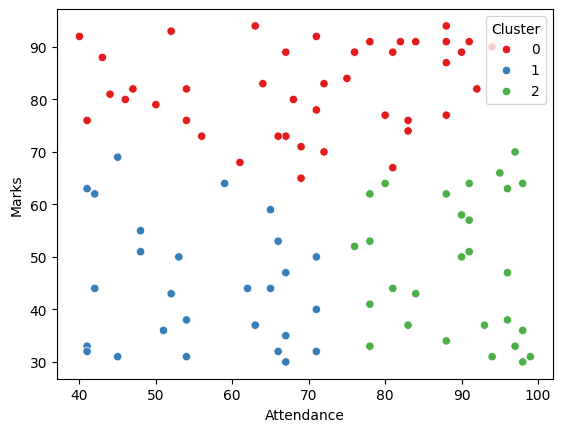

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Marks", "Attendance"]])

sns.scatterplot(x="Attendance", y="Marks", hue="Cluster", data=df, palette="Set1")


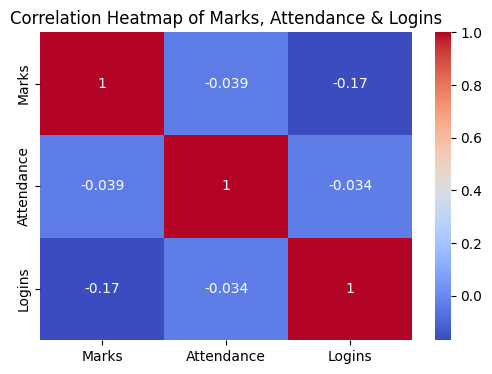

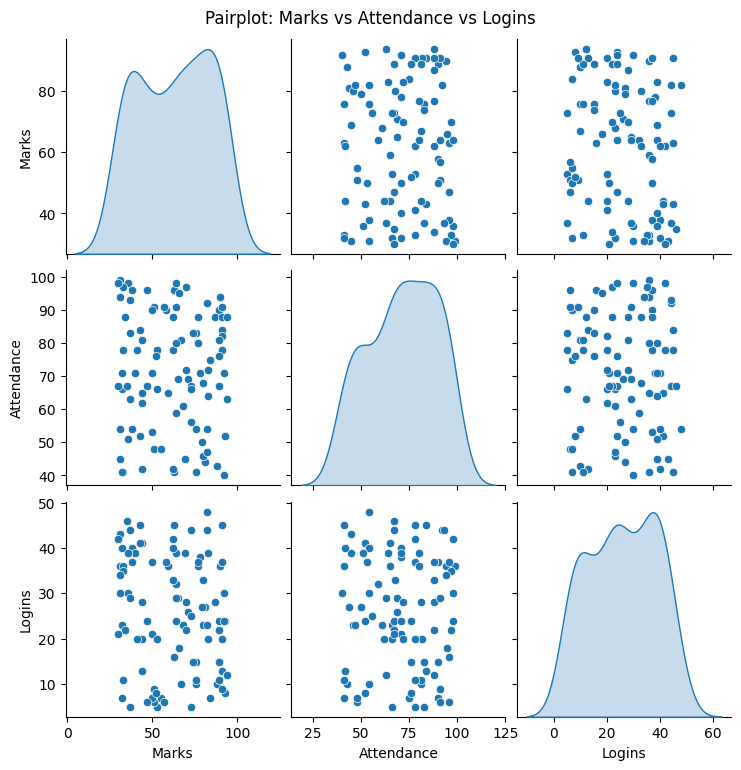

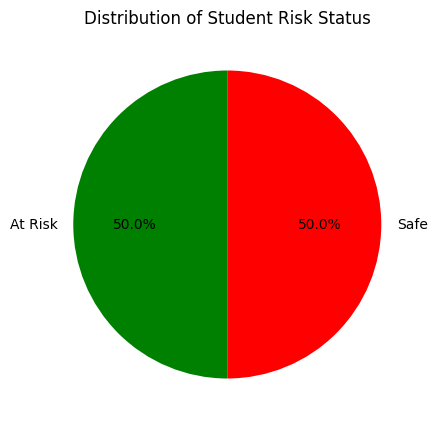

In [40]:
# --- Correlation Heatmap (Marks, Attendance, Logins) ---
plt.figure(figsize=(6,4))
sns.heatmap(df[["Marks", "Attendance", "Logins"]].corr(), annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Marks, Attendance & Logins")
plt.show()

# --- Pairplot (Quick Overview of Relationships) ---
sns.pairplot(df[["Marks", "Attendance", "Logins"]], diag_kind="kde", kind="scatter")
plt.suptitle("Pairplot: Marks vs Attendance vs Logins", y=1.02)
plt.show()

# --- Risk Distribution Pie Chart ---
# If Risk_Status column not created yet, create it
if "Risk_Status" not in df.columns:
    df["Risk_Status"] = df.apply(
        lambda row: "At Risk" if (row["Marks"] < 50 or row["Attendance"] < 60) else "Safe", axis=1
    )

risk_counts = df["Risk_Status"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%',
        colors=["green", "red"], startangle=90)
plt.title("Distribution of Student Risk Status")
plt.show()


In [41]:
print(f"Average Marks: {df['Marks'].mean():.2f}")
print(f"Average Attendance: {df['Attendance'].mean():.2f}%")


Average Marks: 62.80
Average Attendance: 71.54%


In [42]:
import os
print(os.getcwd())


C:\Users\Asus\Desktop\project
